# Section A

## 1.  Research Question

## 2.  Business Relevance

## 3.  Relevant Data

# Section B

## 1.  Statistical Testing

In [1]:
# read churn_clean dataset into pandas DataFrame
# import pandas for analysis and data manipulation
import pandas as pd

df = pd.read_csv('source files/churn_clean.csv')


# isolate features relevant to research question
df = df.loc[:, ['Area', 'Outage_sec_perweek', 'MonthlyCharge', 'Churn']]
df.head(5)

,Area,Outage_sec_perweek,MonthlyCharge,Churn
0,Urban,7.978323,172.455519,No
1,Urban,11.699080,242.632554,Yes
2,Urban,10.752800,159.947583,No
3,Suburban,14.913540,119.956840,No
4,Suburban,8.147417,149.948316,Yes


In [75]:
# import scipy.stats to perform the ANOVA
import scipy.stats as stats

In [85]:
# extract groups from df (by Area type)
urban = df[df['Area'] == 'Urban'][['Outage_sec_perweek']]
suburban = df[df['Area'] == 'Suburban'][['Outage_sec_perweek']]
rural = df[df['Area'] == 'Rural'][['Outage_sec_perweek']]

# perform the ANOVA
stats.f_oneway(urban, suburban, rural)

ValueError: zero-dimensional arrays cannot be concatenated

## 2.  Output

## 3.  Justification

# Section C

## Visualization of Univariate Statistics

In [6]:
# import seaborn and matplotlib for visualizations
import seaborn as sns
import matplotlib.pyplot as plt

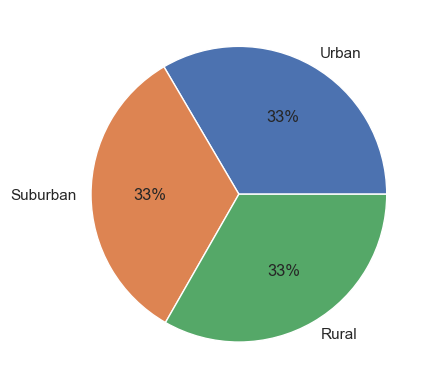

In [14]:
# Draw a piechart of Area
# Count number of records by Area type
data = df['Area'].value_counts()
sns.set_theme()
plt.pie(data, labels=['Urban', 'Suburban', 'Rural'], autopct='%.0f%%')
plt.show()

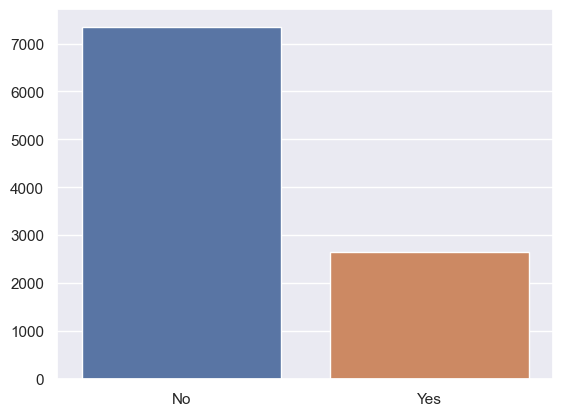

In [15]:
# Draw a barplot of Churn
# Count number of records by customer Churn
data = df['Churn'].value_counts()
sns.barplot(x=data.index, y=data.values)
plt.show()

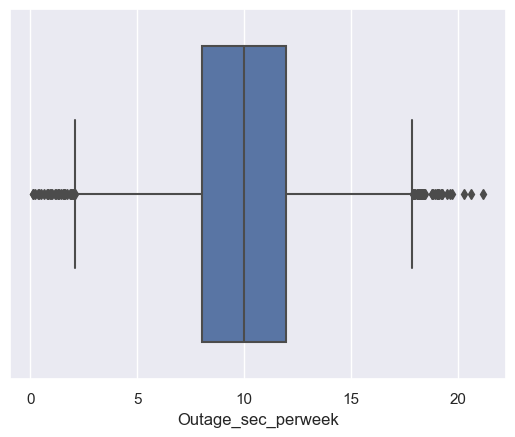

In [8]:
# Draw a boxplot of Outage_sec_perweek
sns.boxplot(x='Outage_sec_perweek', data=df)
plt.show()

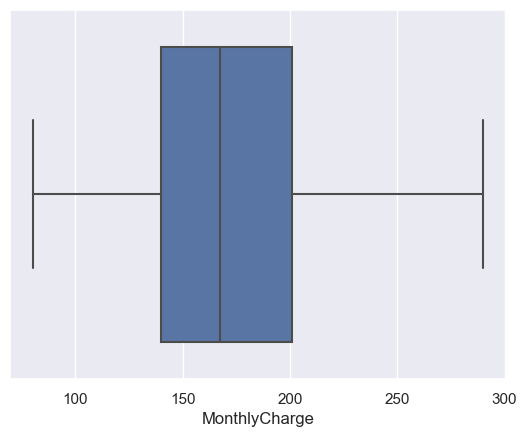

In [88]:
# Draw a boxplot of MonthlyCharge
sns.boxplot(x='MonthlyCharge', data=df)
plt.show()

# Section D

## Visualization of Bivariate Statistics

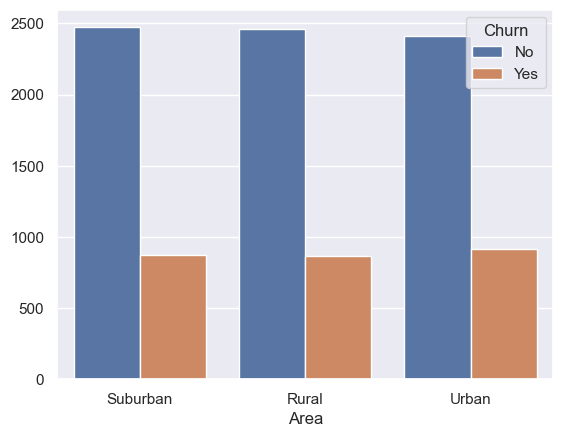

In [86]:
# Draw a barplot of Area and Churn
# Count number of records by customer Churn, then Area (multilevel index)
data = df[['Area', 'Churn']].value_counts()
sns.barplot(x=data.index.get_level_values(0), y=data.values, hue=data.index.get_level_values(1))
plt.show()

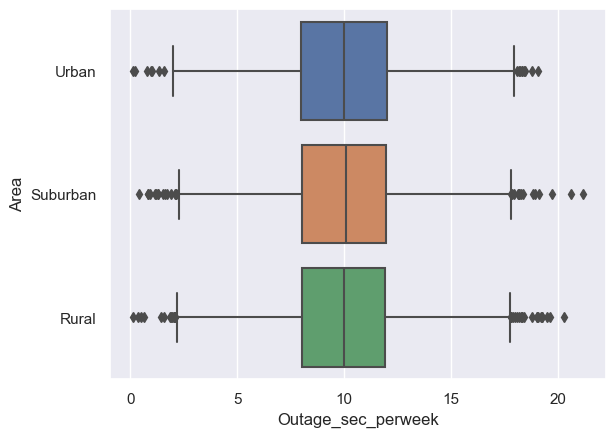

In [87]:
# Draw a boxplot of Outage_sec_perweek by Area
sns.boxplot(x='Outage_sec_perweek', y='Area', data=df)
plt.show()

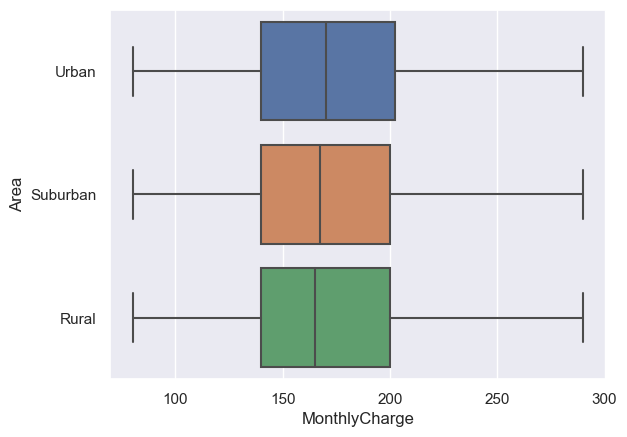

In [89]:
# Draw a boxplot of MonthlyCharge by Area
sns.boxplot(x='MonthlyCharge', y='Area', data=df)
plt.show()

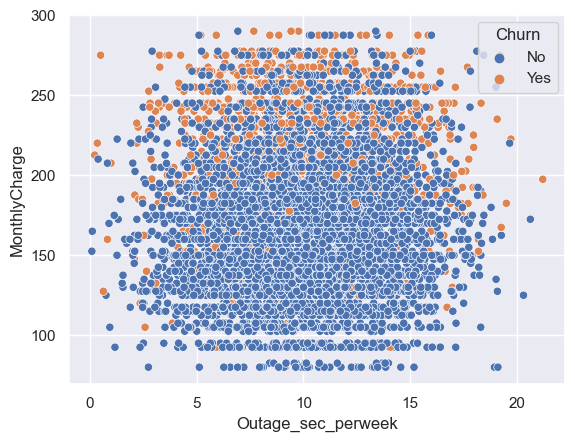

In [91]:
# Draw a scatterplot of Outage_sec_perweek against MonthlyCharge, grouped by customer Churn
sns.scatterplot(data=df, x='Outage_sec_perweek', y='MonthlyCharge', hue='Churn')
plt.show()

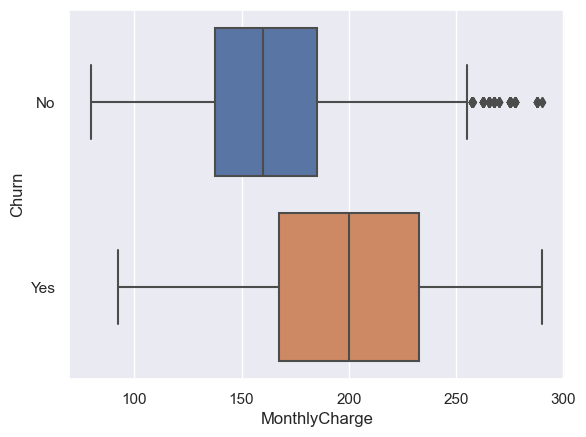

In [92]:
# Draw a boxplot of MonthlyCharge by customer Churn
sns.boxplot(x='MonthlyCharge', y='Churn', data=df)
plt.show()

# Section E

## 1. Results

## 2. Limitations

## 3. Next Steps

# Section F

# Panopto Recording

# Section G
## Web Sources

# Section H
## References